# Machine Learning Models (Linear Regression) Interpretability and Explainer 

# Model Interpretability

Interpretability is the degree to which a human can understand the cause of a decision.

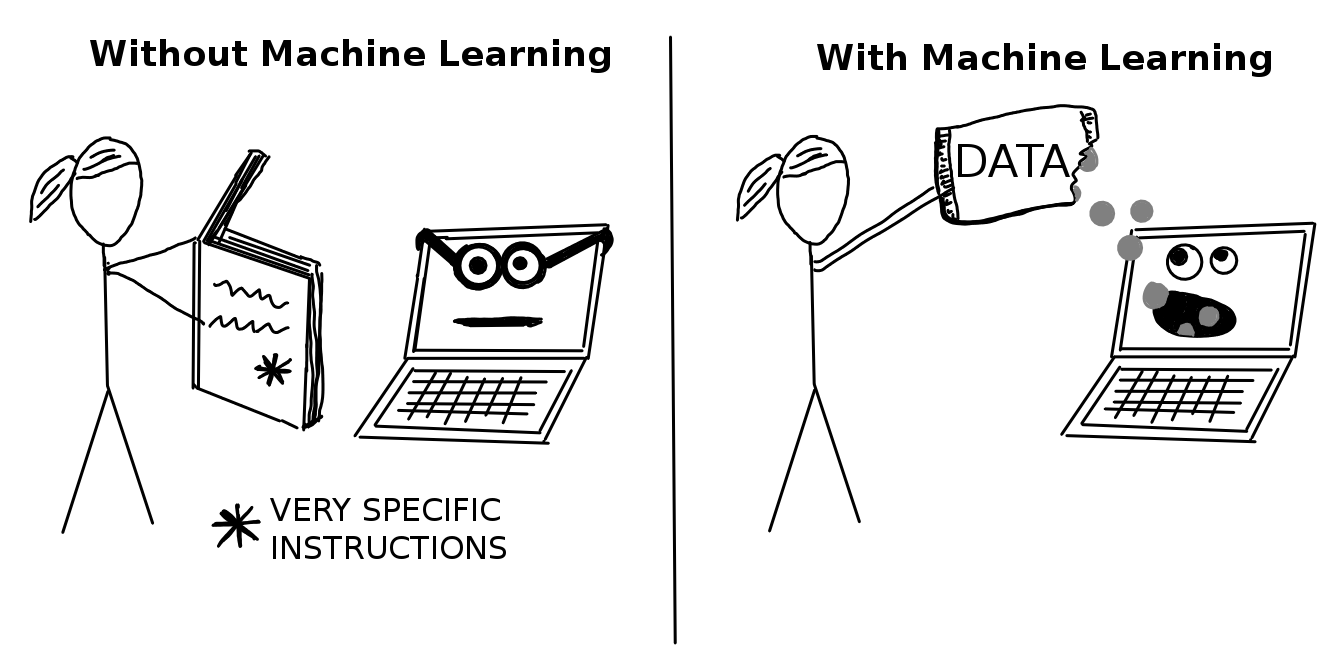

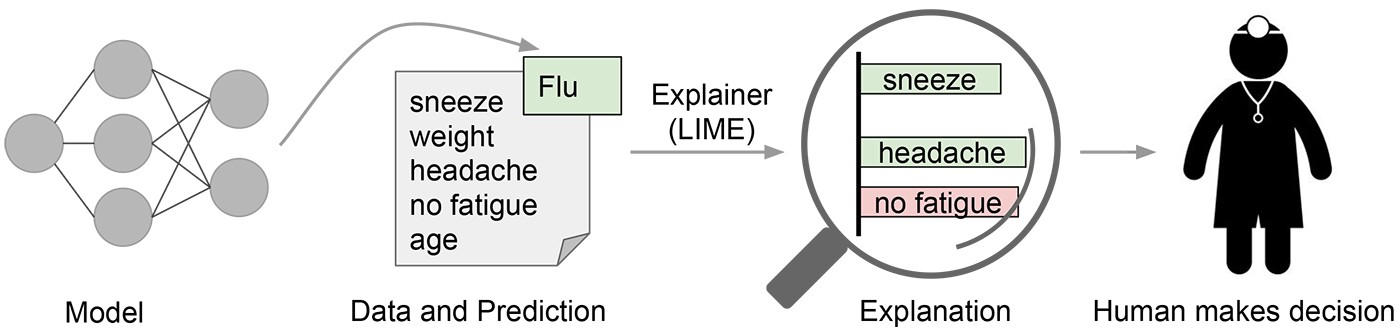

Python Libraries
- Yellowbrick | `pip install yellowbrick` | https://www.scikit-yb.org/en/latest/
- LIME | `pip install lime` | https://github.com/marcotcr/lime
- SHAP | `pip install shap` | https://github.com/slundberg/shap


- ELI5 | `pip install eli5` | https://eli5.readthedocs.io/en/latest/
- Skater | `https://github.com/oracle/Skater#install-skater`

## Recap

## Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

In [2]:
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston = pd.DataFrame(data.data, columns=data.feature_names)
boston['Price'] = data.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
features = list(data.feature_names)
print(features)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


# Model Interpretability

## Yellowbrick

#### Prediction Error Plot and Residuals Plot

In [5]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
X_train, X_test, y_train, y_test = train_test_split(boston[features],
                                                    boston['Price'],
                                                    test_size=0.2,
                                                    random_state=0)

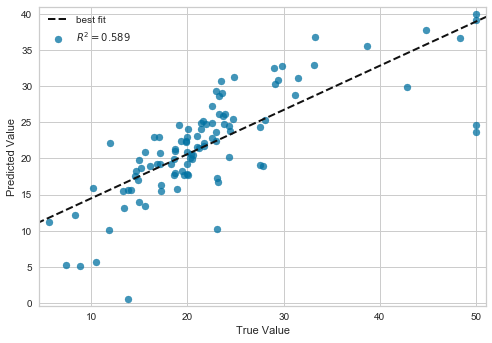

In [8]:
model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

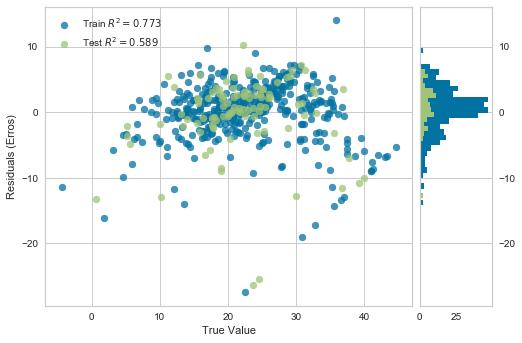

In [9]:
model = LinearRegression()

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.xlabel('True Value')
plt.ylabel('Residuals (Erros)')
plt.legend()
plt.show()

## LIME 

**Local Interpretable Model-Agnostic Explanations (LIME)** — It should be locally interpretable and able to explain any models.

- LIME doesn’t make any assumptions about the model whose prediction is explained.
- It treats the model as a black-box, so the only way that it has to understand its behavior is perturbing the input and see how the predictions change.
- LIME produces an explanation by approximating the black-box model by an interpretable model

`pip install lime` | https://github.com/marcotcr/lime

In [10]:
import lime
import lime.lime_tabular

In [11]:
features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(boston[features].to_numpy(),
                                                    boston['Price'].to_numpy(),
                                                    test_size=0.2,
                                                    random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
mean_squared_error(y_test, y_pred)

33.448979997676474

In [14]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
                                                   feature_names=features,
                                                   class_names=['Price'],
                                                   verbose=True,
                                                   mode = 'regression'
                                                  )

In [15]:
i=2
exp = explainer.explain_instance(X_test[i], model.predict, num_features=5)


Intercept 20.535614645556123
Prediction_local [31.29901366]
Right: 29.364998677356088


In [16]:
exp.show_in_notebook(show_table=True)

In [17]:
model.predict(X_test[i].reshape(1, -1))

array([29.36499868])

In [18]:
X_test[i]

array([1.1425e-01, 0.0000e+00, 1.3890e+01, 1.0000e+00, 5.5000e-01,
       6.3730e+00, 9.2400e+01, 3.3633e+00, 5.0000e+00, 2.7600e+02,
       1.6400e+01, 3.9374e+02, 1.0500e+01])

In [19]:
print(features)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [20]:
xt = pd.DataFrame(X_train, columns=features)
xt.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.386324,11.794554,11.123441,0.069307,0.555886,6.301797,69.027228,3.770242,9.403465,402.844059,18.462376,358.785446,12.706188
std,8.137943,23.636906,6.993011,0.254290,0.115201,0.694692,28.106955,2.080583,8.661147,170.857022,2.194821,88.663438,7.299031
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.078935,0.000000,5.130000,0.000000,0.449000,5.887750,45.675000,2.087875,4.000000,276.000000,17.400000,376.132500,6.727500
50%,0.256510,0.000000,9.125000,0.000000,0.538000,6.211000,77.950000,3.190950,5.000000,322.000000,19.100000,391.600000,11.300000
75%,3.359358,20.000000,18.100000,0.000000,0.631000,6.675000,93.900000,5.141475,24.000000,666.000000,20.200000,396.060000,17.112500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## SHAP 

`pip install shap` | https://github.com/slundberg/shap

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model.

- Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
- Correlation: A high level of the “RM” content has a high and positive impact on the House Price. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, we will say “CRIM” is negatively correlated with the target variable.

### Summary Matrix

In [21]:
# !pip install shap --user

In [ ]:
import shap

In [23]:
shap.initjs()

In [24]:
print(features)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [25]:
# cols = ['RM', 'LSTAT', 'CRIM']
cols = features
X_train, X_test, y_train, y_test = train_test_split(boston[cols], boston['Price'],
                test_size=0.2,
                random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
explainer = shap.KernelExplainer(model.predict, X_test)

shap_values = explainer.shap_values(X_test, nsamples=100)

Using 102 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [27]:
shap_values.shape

(102, 13)

In [28]:
X_test.shape

(102, 13)

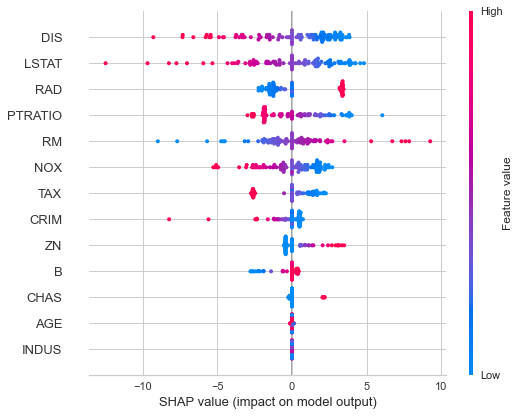

In [29]:
shap.summary_plot(shap_values, X_test)

## The Dependence Plot 

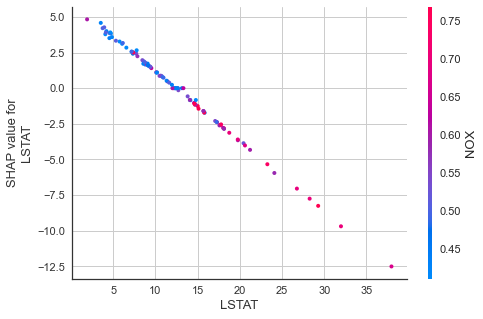

In [30]:
shap.dependence_plot('LSTAT', shap_values, X_test)

### The Individual Force Plot

You can produce a very elegant plot for each observation called the force plot. I arbitrarily chose the `1st` observation of the X_test data. Below are the average values of X_test, and the values of the `1st` observation.

In [31]:
i=11
X_test.iloc[i]

CRIM        14.0507
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.5970
RM           6.6570
AGE        100.0000
DIS          1.5275
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B           35.0500
LSTAT       21.2200
Name: 411, dtype: float64

In [32]:
shap_values[i]

array([-1.14465629, -0.43253194,  0.        , -0.16468366, -0.7389581 ,
        1.613757  ,  0.        ,  3.25502091,  3.40222953, -2.61474984,
       -1.86845571, -2.55481075, -4.3248192 ])

In [33]:
explainer.expected_value

21.959397643961967

In [34]:
model.predict(X_test).mean()

21.959397643961978

In [35]:
shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i])

### The Collective Force Plot 

Each observation has its own force plot. If all the force plots are combined, rotated 90 degrees and stacked horizontally, we get the force plot of the entire data X_test 

In [36]:
shap.force_plot(explainer.expected_value, shap_values, X_test)

### SHAP Heatmap 

In [37]:
X = boston[features]
y = boston['Price']
model = LinearRegression().fit(X,y)

In [38]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


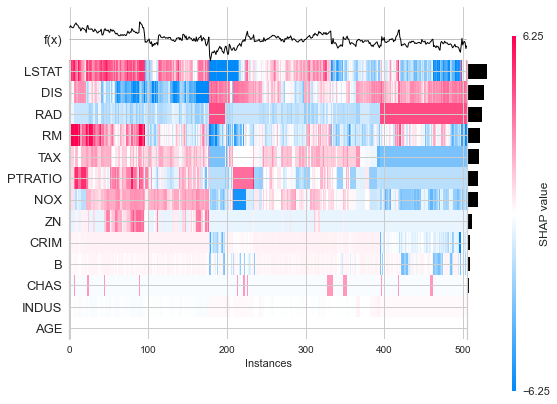

In [39]:
shap.plots.heatmap(shap_values,max_display=13)

### Explain Machine Learning Model with SHAP Waterfall 

Waterfall plots are designed to display explanations for individual predictions, so they expect a single row of an Explanation object as input.

The bottom of a waterfall plot starts as the expected value of the model output, and then each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.

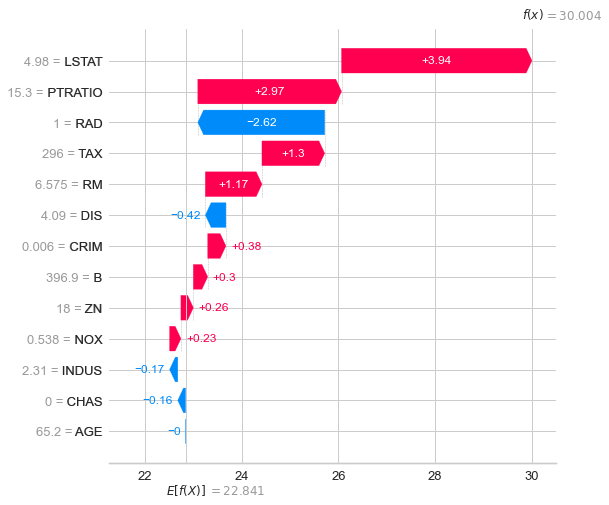

In [40]:
i=0
shap.plots.waterfall(shap_values[i], max_display=13)

In [41]:
y.mean()

22.532806324110698

In [42]:
model.predict(X)[0]

30.003843377016757

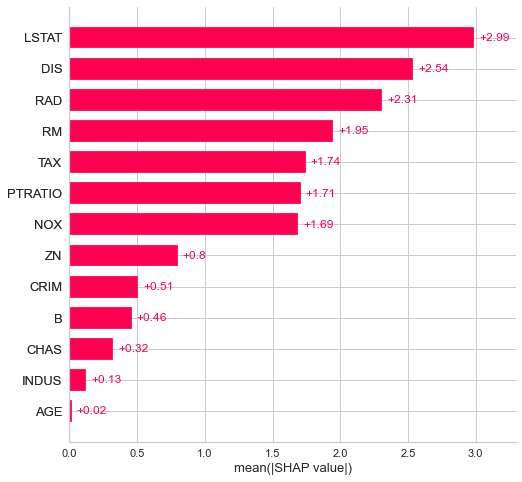

In [43]:
shap.plots.bar(shap_values, max_display=13)

## Feature Selection with SHAP

In [44]:
print(features)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [45]:
least_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE',  'B']
imp_features = ['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

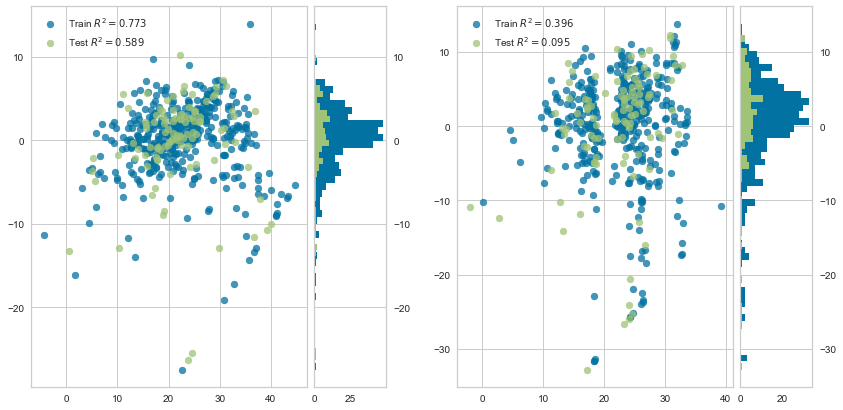

In [46]:
def run_Linear_Regression(df):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(boston[features], boston['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(df, boston['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  


run_Linear_Regression(boston[least_features])

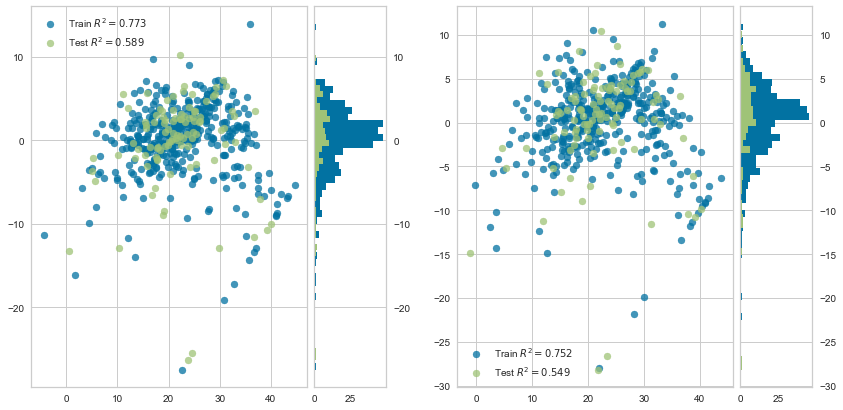

In [47]:
run_Linear_Regression(boston[imp_features])

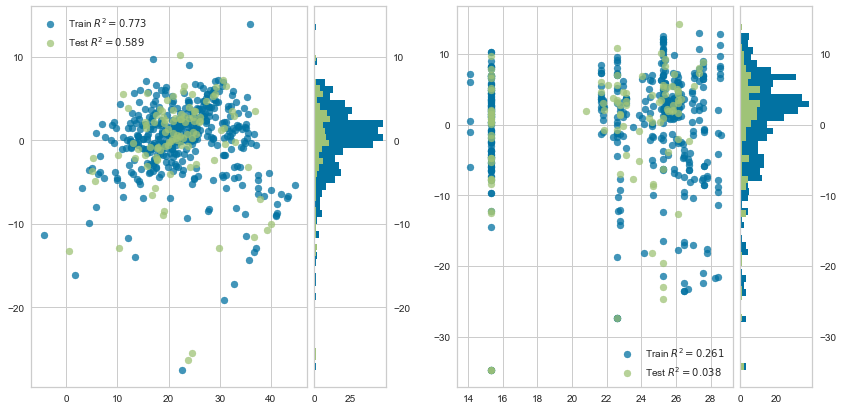

In [48]:
run_Linear_Regression(boston[['TAX']])